# Exploring the books in our dataset
In this notebook, I'm going to explore just the books in my dataset.
First, I'll look at the books from the kaggle dataset, then I'll join them with the books scraped from goodreads to get more information about them.

## Setup
### Import libraries

In [1]:
#importing the required libraries
#Data wrangling
import numpy as np
import pandas as pd
#data visualization
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
#get the path of the parent directory with pathlib
from pathlib import Path
data_folder = Path.cwd().parent / 'data'
transformed_folder=data_folder/'transformed'
BOOKS_PATH=Path(data_folder,"books.csv")
SCRAPED_PATH=Path(data_folder,"book_best_001_100.jl")

## Explore books
### Load the books from the kaggle dataset

In [2]:
books=pd.read_csv(BOOKS_PATH)
books.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [3]:
#see the unique languages
books.language_code.unique()

array(['eng', 'en-US', 'en-CA', nan, 'spa', 'en-GB', 'fre', 'nl', 'ara',
       'por', 'ger', 'nor', 'jpn', 'en', 'vie', 'ind', 'pol', 'tur',
       'dan', 'fil', 'ita', 'per', 'swe', 'rum', 'mul', 'rus'],
      dtype=object)

In [4]:
#see some russian books
books[books.language_code=='rus'].head()

book_id  goodreads_book_id  best_book_id  work_id  books_count  \
9883     9884              97390         97390    93879           32   

            isbn        isbn13  \
9883  5080039159  9.785080e+12   

                                                authors  \
9883  Aleksandr Griboyedov, Александр Сергеевич Гриб...   

      original_publication_year original_title  ... ratings_count  \
9883                     1825.0   Горе от ума   ...          9287   

     work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  \
9883               9690                       36        159        553   

      ratings_3  ratings_4  ratings_5  \
9883       1674       2791       4513   

                                              image_url  \
9883  https://images.gr-assets.com/books/1342993233m...   

                                        small_image_url  
9883  https://images.gr-assets.com/books/1342993233s...  

[1 rows x 23 columns]

### Removing nans in isbn
I will select only some columns for exploration

In [5]:
#number of books with nan isbn
books.isbn.isna().sum()

700

In [6]:

selected_columns = ['book_id','title',
                    'isbn', 'isbn13', "goodreads_book_id","best_book_id","language_code"]

books_reduced = books[selected_columns].copy()[~books.isbn.isna()]
books_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9300 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   book_id            9300 non-null   int64  
 1   title              9300 non-null   object 
 2   isbn               9300 non-null   object 
 3   isbn13             9280 non-null   float64
 4   goodreads_book_id  9300 non-null   int64  
 5   best_book_id       9300 non-null   int64  
 6   language_code      8256 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 581.2+ KB


In [7]:
books_reduced.head()

book_id                                              title       isbn  \
0        1            The Hunger Games (The Hunger Games, #1)  439023483   
1        2  Harry Potter and the Sorcerer's Stone (Harry P...  439554934   
2        3                            Twilight (Twilight, #1)  316015849   
3        4                              To Kill a Mockingbird   61120081   
4        5                                   The Great Gatsby  743273567   

         isbn13  goodreads_book_id  best_book_id language_code  
0  9.780439e+12            2767052       2767052           eng  
1  9.780440e+12                  3             3           eng  
2  9.780316e+12              41865         41865         en-US  
3  9.780061e+12               2657          2657           eng  
4  9.780743e+12               4671          4671           eng

### See where goodreads_book_id==best_book_id

In [8]:
books_reduced[books_reduced.best_book_id!=books_reduced.goodreads_book_id]

book_id                                              title        isbn  \
29         30                                          Gone Girl   297859382   
32         33                                Memoirs of a Geisha   739326228   
37         38                           The Time Traveler's Wife   965818675   
53         54  The Hitchhiker's Guide to the Galaxy (Hitchhik...   345391802   
83         84                  Jurassic Park (Jurassic Park, #1)  030734813X   
...       ...                                                ...         ...   
9240     9241    Truth Will Prevail (The Work and the Glory, #3)  1590384989   
9323     9324                                            Capital   571234607   
9477     9478             Tao of Pooh and Te of Piglet Boxed Set  014095144X   
9786     9787                              We Are Called to Rise  1476738963   
9898     9899  Grit: Passion, Perseverance, and the Science o...  1442397144   

            isbn13  goodreads_book_id  best_book_id language_code  
29    9.780298e+12            8442457      19288043           eng  
32    9.780739e+12                930           929           eng  
37    9.780966e+12              14050      18619684           eng  
53    9.780345e+12                 11        386162         en-US  
83    9.780307e+12               7677       6424171           spa  
...            ...                ...           ...           ...  
9240  9.781590e+12             381787      20214789           NaN  
9323  9.780571e+12           12039943      16241160           NaN  
9477  9.780141e+12              89370      29554877           eng  
9786  9.781477e+12           18271235      20385637           eng  
9898  9.781442e+12           25813921      27213329           eng  

[158 rows x 7 columns]

## Explore scraped data from  goodreads

I wanted my books to have a description, so I scraped the goodreads website to get the descriptions of the books in my dataset. I will load the data and explore it.
### Load the books from goodreads

In [9]:
goodreads_df=pd.read_json(SCRAPED_PATH, lines=True)
goodreads_df.columns

Index(['url', 'title', 'titleComplete', 'description', 'imageUrl', 'genres',
       'asin', 'isbn13', 'publisher', 'author', 'publishDate', 'characters',
       'places', 'ratingHistogram', 'ratingsCount', 'reviewsCount', 'numPages',
       'language', 'awards', 'isbn', 'series'],
      dtype='object')

In [10]:
goodreads_df.language.unique()

array(['English', 'French', nan, 'Spanish; Castilian', 'German', 'Arabic',
       'Persian', 'Scots', 'Bulgarian', 'Polish', 'Portuguese',
       'Multiple languages', 'Indonesian', 'Turkish', 'Romanian',
       'Japanese', 'Tamil', 'Chinese', 'Italian', 'Dutch; Flemish',
       'French, Middle (ca.1400-1600)', 'Urdu', 'Norwegian', 'Marathi',
       'Swedish', 'Undetermined', 'Icelandic',
       'Bokmål, Norwegian; Norwegian Bokmål', 'Finnish', 'Malayalam',
       'Estonian', 'Vietnamese', 'Korean', 'Greek, Modern (1453-)',
       'Russian', 'Croatian'], dtype=object)

In [11]:
#see some korean books
goodreads_df[goodreads_df.language=='Korean'].head()

url     title titleComplete  \
9260  https://www.goodreads.com/book/show/35297901-82  82년생 김지영      82년생 김지영   

                                            description  \
9260  “사람들이 나보고 맘충이래.” 한국에서 여자로 살아가는 일 그 공포, 피로, 당황,...   

                                               imageUrl  \
9260  https://images-na.ssl-images-amazon.com/images...   

                                                 genres        asin  \
9260  [Literary Fiction, Adult Fiction, Audiobook, C...  8937473135   

            isbn13 publisher              author  ...  characters places  \
9260  9.788937e+12       민음사  [Cho Nam-joo, 조남주]  ...         NaN    NaN   

                       ratingHistogram ratingsCount  reviewsCount  numPages  \
9260  [505, 2778, 19465, 56878, 49149]     128775.0       19918.0     192.0   

      language                                             awards        isbn  \
9260    Korean  [{'name': 'National Book Award', 'awardedAt': ...  8937473135   

     series  
9260    NaN  

[1 rows x 21 columns]

### Removing nans in isbn

In [12]:
#select the columns and remove the rows with missing values
selected_columns = ['url','title', 'titleComplete', 'description', 'imageUrl', 'genres',
                    'isbn', 'isbn13', 'publisher', 'author', 'publishDate','language']
goodreads_df_reduced = goodreads_df[selected_columns].copy()[~goodreads_df.isbn.isna()]
# goodreads_df_reduced['isbn'] = goodreads_df_reduced['isbn'].astype(str)
# goodreads_df_reduced['isbn13'] = goodreads_df_reduced['isbn13'].astype(str)
goodreads_df_reduced.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7989 entries, 1 to 9998
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            7989 non-null   object 
 1   title          7989 non-null   object 
 2   titleComplete  7989 non-null   object 
 3   description    7982 non-null   object 
 4   imageUrl       7985 non-null   object 
 5   genres         7928 non-null   object 
 6   isbn           7989 non-null   object 
 7   isbn13         7901 non-null   float64
 8   publisher      7956 non-null   object 
 9   author         7989 non-null   object 
 10  publishDate    7977 non-null   float64
 11  language       7939 non-null   object 
dtypes: float64(2), object(10)
memory usage: 811.4+ KB


### Extract the goodreads_book_id from the url

In [13]:
goodreads_df_reduced['goodreads_book_id'] = goodreads_df_reduced['url'].str.extract(r'/(\d+)[^/]*$').astype(int)

goodreads_df_reduced.loc[:,["goodreads_book_id","url"]]

goodreads_book_id                                                url
1                  2175  https://www.goodreads.com/book/show/2175.Madam...
3                   295  https://www.goodreads.com/book/show/295.Treasu...
5                426504  https://www.goodreads.com/book/show/426504.Fic...
6                307791  https://www.goodreads.com/book/show/307791.The...
7                 27712  https://www.goodreads.com/book/show/27712.The_...
...                 ...                                                ...
9994           11737268  https://www.goodreads.com/book/show/11737268-t...
9995              12334    https://www.goodreads.com/book/show/12334.Zelda
9996             782854  https://www.goodreads.com/book/show/782854.Eloise
9997            6621972  https://www.goodreads.com/book/show/6621972-pr...
9998           13316328  https://www.goodreads.com/book/show/13316328-t...

[7989 rows x 2 columns]

## Join the two dataframes
The data from kaggle doesn't have book descriptions, so I'm going to join it with the scraped data
### Check for duplicates in isbn

In [14]:
#check for duplicates
ids = goodreads_df_reduced["isbn"]
goodreads_df_reduced[ids.isin(ids[ids.duplicated()])].sort_values("isbn")

Empty DataFrame
Columns: [url, title, titleComplete, description, imageUrl, genres, isbn, isbn13, publisher, author, publishDate, language, goodreads_book_id]
Index: []

In [15]:
ids = books_reduced["isbn"]
books_reduced[ids.isin(ids[ids.duplicated()])].sort_values("isbn")

Empty DataFrame
Columns: [book_id, title, isbn, isbn13, goodreads_book_id, best_book_id, language_code]
Index: []

### Check for duplicates in goodreads_book_id

In [16]:
ids = goodreads_df_reduced["goodreads_book_id"]
goodreads_df_reduced[ids.isin(ids[ids.duplicated()])].sort_values("goodreads_book_id")

Empty DataFrame
Columns: [url, title, titleComplete, description, imageUrl, genres, isbn, isbn13, publisher, author, publishDate, language, goodreads_book_id]
Index: []

In [17]:
ids = books_reduced["goodreads_book_id"]
books_reduced[ids.isin(ids[ids.duplicated()])].sort_values("goodreads_book_id")

Empty DataFrame
Columns: [book_id, title, isbn, isbn13, goodreads_book_id, best_book_id, language_code]
Index: []

In [18]:
ids = books_reduced["best_book_id"]
books_reduced[ids.isin(ids[ids.duplicated()])].sort_values("best_book_id")

Empty DataFrame
Columns: [book_id, title, isbn, isbn13, goodreads_book_id, best_book_id, language_code]
Index: []

### Merge the two dataframes on goodreads_book_id

In [19]:
merged_df_on_goodreads_book_id = pd.merge(books_reduced, goodreads_df_reduced, left_on='goodreads_book_id', right_on='goodreads_book_id', how='inner')
merged_df_on_goodreads_book_id.count()

book_id              4678
title_x              4678
isbn_x               4678
isbn13_x             4668
goodreads_book_id    4678
best_book_id         4678
language_code        4315
url                  4678
title_y              4678
titleComplete        4678
description          4678
imageUrl             4678
genres               4678
isbn_y               4678
isbn13_y             4665
publisher            4666
author               4678
publishDate          4674
language             4665
dtype: int64

In [20]:
merged_df_on_goodreads_book_id.book_id.unique().shape

(4678,)

In [21]:
merged_df_on_goodreads_book_id.columns

Index(['book_id', 'title_x', 'isbn_x', 'isbn13_x', 'goodreads_book_id',
       'best_book_id', 'language_code', 'url', 'title_y', 'titleComplete',
       'description', 'imageUrl', 'genres', 'isbn_y', 'isbn13_y', 'publisher',
       'author', 'publishDate', 'language'],
      dtype='object')

### Merge the two dataframes on isbn

In [22]:
merged_df_on_isbn = pd.merge(books_reduced, goodreads_df_reduced, left_on='isbn', right_on='isbn', how='inner')
same_isbn=merged_df_on_isbn.isbn
merged_df_on_isbn.count()

book_id                1309
title_x                1309
isbn                   1309
isbn13_x               1300
goodreads_book_id_x    1309
best_book_id           1309
language_code          1206
url                    1309
title_y                1309
titleComplete          1309
description            1309
imageUrl               1309
genres                 1309
isbn13_y               1300
publisher              1301
author                 1309
publishDate            1309
language               1307
goodreads_book_id_y    1309
dtype: int64

In [23]:
merged_df_on_isbn.book_id.unique().shape

(1309,)

This dataframe has fewer rows.

Check how many data points with the same goodreads_book_id don't have the same isbn.

In [24]:
#merged_df_on_isbn is a subset of merged_df_on_id
merged_df_on_goodreads_book_id[~merged_df_on_goodreads_book_id.isbn_x.isin(same_isbn)].loc[:,['title_x', 'isbn_x', 'title_y','goodreads_book_id','isbn_y',]]

title_x     isbn_x  \
0              The Hunger Games (The Hunger Games, #1)  439023483   
1                              Twilight (Twilight, #1)  316015849   
2                               The Catcher in the Rye  316769177   
4                            Divergent (Divergent, #1)   62024035   
5     The Girl with the Dragon Tattoo (Millennium, #1)  307269752   
...                                                ...        ...   
4672                       The Ground Beneath Her Feet  312254997   
4674                             Sea Glass (Glass, #2)  778325806   
4675                When the Lion Feeds (Courtney, #1)  312940661   
4676                                  The Snow Leopard  140255087   
4677                                 The Famished Road  385425139   

                              title_y  goodreads_book_id      isbn_y  
0                    The Hunger Games            2767052  0439023483  
1                            Twilight              41865  0316015849  
2              The Catcher in the Rye               5107  0316769177  
4                           Divergent           13335037  0062024035  
5     The Girl with the Dragon Tattoo            2429135  0670069019  
...                               ...                ...         ...  
4672      The Ground Beneath Her Feet               9864  0312254997  
4674                        Sea Glass            6351939  0778325806  
4675              When the Lion Feeds              16951  0312940661  
4676                 The Snow Leopard             764165  0140255087  
4677                The Famished Road             101094  0385425139  

[3370 rows x 5 columns]

Check how many of the data points with the same isbn don't have the same goodreads_book_id

In [25]:
#books from the two datasets wit the same isbn but different book_id
same_id=merged_df_on_goodreads_book_id.goodreads_book_id
merged_df_on_isbn[~merged_df_on_isbn.goodreads_book_id_x.isin(same_id)].loc[:,['title_x', 'isbn', 'title_y','goodreads_book_id_x','goodreads_book_id_y']]

title_x        isbn  title_y  goodreads_book_id_x  \
1300  Corrupt (Devil's Night, #1)  1518783872  Corrupt             21981841   

      goodreads_book_id_y  
1300             58124274

### Merge the two dataframes on best_book_id
Only books_reduced has the best_book_id column, the right merge is on goodreads_book_id

In [26]:
merged_df_on_best_book_id= pd.merge(books_reduced, goodreads_df_reduced, left_on='best_book_id', right_on='goodreads_book_id', how='inner')
merged_df_on_best_book_id.count()

book_id                4727
title_x                4727
isbn_x                 4727
isbn13_x               4717
goodreads_book_id_x    4727
best_book_id           4727
language_code          4362
url                    4727
title_y                4727
titleComplete          4727
description            4727
imageUrl               4727
genres                 4727
isbn_y                 4727
isbn13_y               4713
publisher              4714
author                 4727
publishDate            4723
language               4714
goodreads_book_id_y    4727
dtype: int64

In [27]:
merged_df_on_best_book_id.book_id.unique().shape

(4727,)

See if the two overlap

In [28]:
isbn_x_of_merged=pd.concat([merged_df_on_best_book_id.isbn_y,merged_df_on_goodreads_book_id .isbn_y])
book_id_of_merged=pd.concat([merged_df_on_best_book_id.book_id,merged_df_on_goodreads_book_id.book_id])
len(book_id_of_merged.unique())

4742

In [29]:
len(isbn_x_of_merged.unique())

4742

From the number of unique isbns in the merged dataframe, we can conclude that they significally overlap.

### Strategy for joining data

We will join books_reduced and goodreads_df_reduced on best_books_id and goodreads_book_id. 
From books_reduced I will only take the book_id because it is used in other tables, and the other columns I will take from goodreads_book_id

In [30]:
merged_df = pd.concat([merged_df_on_best_book_id, merged_df_on_goodreads_book_id]).drop_duplicates("isbn_y").reset_index(drop=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4742 entries, 0 to 4741
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   book_id              4742 non-null   int64  
 1   title_x              4742 non-null   object 
 2   isbn_x               4742 non-null   object 
 3   isbn13_x             4732 non-null   float64
 4   goodreads_book_id_x  4727 non-null   float64
 5   best_book_id         4742 non-null   int64  
 6   language_code        4376 non-null   object 
 7   url                  4742 non-null   object 
 8   title_y              4742 non-null   object 
 9   titleComplete        4742 non-null   object 
 10  description          4742 non-null   object 
 11  imageUrl             4742 non-null   object 
 12  genres               4742 non-null   object 
 13  isbn_y               4742 non-null   object 
 14  isbn13_y             4728 non-null   float64
 15  publisher            4729 non-null   o

In [31]:
selected_columns = ['book_id','url','title_y',
                    'isbn_y','description','imageUrl','genres','publisher','author','publishDate','goodreads_book_id_y','goodreads_book_id','language']

books_final = merged_df[selected_columns].copy()
books_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4742 entries, 0 to 4741
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   book_id              4742 non-null   int64  
 1   url                  4742 non-null   object 
 2   title_y              4742 non-null   object 
 3   isbn_y               4742 non-null   object 
 4   description          4742 non-null   object 
 5   imageUrl             4742 non-null   object 
 6   genres               4742 non-null   object 
 7   publisher            4729 non-null   object 
 8   author               4742 non-null   object 
 9   publishDate          4738 non-null   float64
 10  goodreads_book_id_y  4727 non-null   float64
 11  goodreads_book_id    15 non-null     float64
 12  language             4729 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 481.7+ KB


Check if goodreads_book_id_y  and goodreads_book_id are complementary(they should)

In [32]:
goodreads_book_id_y_int=books_final.goodreads_book_id_y.isna().astype("int")
goodreads_book_id_int=books_final.goodreads_book_id.isna().astype("int")
((goodreads_book_id_y_int+goodreads_book_id_int)==1).all()

True

## Final touches
Create a goodreads_book_id column without nans

In [33]:
helper_ser = pd.merge(books_final.isbn_y,goodreads_df_reduced,left_on="isbn_y",right_on="isbn").goodreads_book_id
books_final.goodreads_book_id=helper_ser
books_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4742 entries, 0 to 4741
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   book_id              4742 non-null   int64  
 1   url                  4742 non-null   object 
 2   title_y              4742 non-null   object 
 3   isbn_y               4742 non-null   object 
 4   description          4742 non-null   object 
 5   imageUrl             4742 non-null   object 
 6   genres               4742 non-null   object 
 7   publisher            4729 non-null   object 
 8   author               4742 non-null   object 
 9   publishDate          4738 non-null   float64
 10  goodreads_book_id_y  4727 non-null   float64
 11  goodreads_book_id    4742 non-null   int32  
 12  language             4729 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(9)
memory usage: 463.2+ KB


In [34]:
books_final.drop("goodreads_book_id_y", axis=1, inplace=True)
books_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4742 entries, 0 to 4741
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   book_id            4742 non-null   int64  
 1   url                4742 non-null   object 
 2   title_y            4742 non-null   object 
 3   isbn_y             4742 non-null   object 
 4   description        4742 non-null   object 
 5   imageUrl           4742 non-null   object 
 6   genres             4742 non-null   object 
 7   publisher          4729 non-null   object 
 8   author             4742 non-null   object 
 9   publishDate        4738 non-null   float64
 10  goodreads_book_id  4742 non-null   int32  
 11  language           4729 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(9)
memory usage: 426.2+ KB


In [35]:
books_final = books_final.rename(columns={'title_y': 'title', 'isbn_y': 'isbn'})

books_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4742 entries, 0 to 4741
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   book_id            4742 non-null   int64  
 1   url                4742 non-null   object 
 2   title              4742 non-null   object 
 3   isbn               4742 non-null   object 
 4   description        4742 non-null   object 
 5   imageUrl           4742 non-null   object 
 6   genres             4742 non-null   object 
 7   publisher          4729 non-null   object 
 8   author             4742 non-null   object 
 9   publishDate        4738 non-null   float64
 10  goodreads_book_id  4742 non-null   int32  
 11  language           4729 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(9)
memory usage: 426.2+ KB


In [36]:
books_final.head(2)

book_id                                                url  \
0        1  https://www.goodreads.com/book/show/2767052-th...   
1        3  https://www.goodreads.com/book/show/41865.Twil...   

              title        isbn  \
0  The Hunger Games  0439023483   
1          Twilight  0316015849   

                                         description  \
0  Could you survive on your own in the wild, wit...   
1  About three things I was absolutely positive.F...   

                                            imageUrl  \
0  https://images-na.ssl-images-amazon.com/images...   
1  https://images-na.ssl-images-amazon.com/images...   

                                              genres  \
0  [Dystopia, Romance, Young Adult, Audiobook, Fi...   
1  [Romance, Supernatural, Paranormal Romance, Pa...   

                   publisher             author   publishDate  \
0           Scholastic Press  [Suzanne Collins]  1.223968e+12   
1  Little, Brown and Company  [Stephenie Meyer]  1.157526e+12   

   goodreads_book_id language  
0            2767052  English  
1              41865  English

<Axes: >

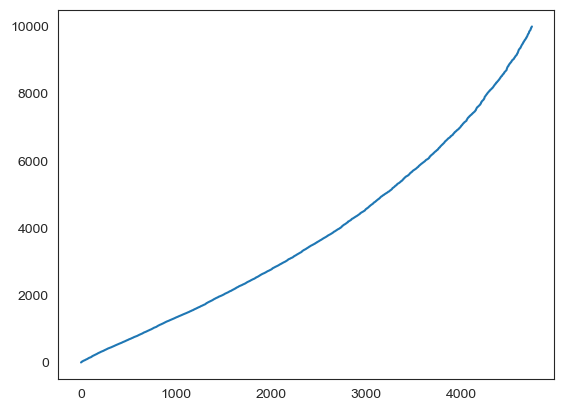

In [37]:
books_final.book_id.sort_values().reset_index(drop=True).plot()

Transform the date column

In [38]:
# Assuming 'books' is your DataFrame
books_final['publishDate'] = pd.to_datetime(books_final['publishDate'], unit='ms').dt.date

In [39]:
books_final['publishDate']

0       2008-10-14
1       2006-09-06
2       2001-01-30
3       2006-04-01
4       2012-01-01
           ...    
4737    2012-10-02
4738    2010-01-07
4739    2002-01-08
4740    2010-05-29
4741    1994-11-01
Name: publishDate, Length: 4742, dtype: object

In [40]:
books_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4742 entries, 0 to 4741
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   book_id            4742 non-null   int64 
 1   url                4742 non-null   object
 2   title              4742 non-null   object
 3   isbn               4742 non-null   object
 4   description        4742 non-null   object
 5   imageUrl           4742 non-null   object
 6   genres             4742 non-null   object
 7   publisher          4729 non-null   object
 8   author             4742 non-null   object
 9   publishDate        4738 non-null   object
 10  goodreads_book_id  4742 non-null   int32 
 11  language           4729 non-null   object
dtypes: int32(1), int64(1), object(10)
memory usage: 426.2+ KB


### Save the data

In [41]:
books_final.to_csv(Path(transformed_folder,"books_expanded.csv"), index=False)

## Conclusion
In this notebook, I selected 4742 books which I will use in the next steps of my project.
Datframes created:

- books_expanded.csv

Further cleaning and exploration will be done in the notebook <a href="fix_the_other_tables.ipynb">fix_the_other_tables.ipynb</a>